In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
import numpy
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
import tkinter

In [2]:
from tkinter import *  
expression = ""


In [3]:
from PIL import ImageTk,Image 

In [4]:
df = pd.read_csv("FinalCleaned.csv")

In [5]:
#Verifying the type of data contained in the cleaned File
df.dtypes

GameAndDrive              int64
FirstDowns                int64
yards_gained              int64
yards_per_first_down    float64
touchdown               float64
dtype: object

In [6]:
X = df.drop('touchdown',axis =1 ).copy()
X.head()

,GameAndDrive,FirstDowns,yards_gained,yards_per_first_down
0,20140904001,3,23,7.666667
1,20140904002,4,25,6.250000
2,20140904003,2,6,3.000000
3,20140904004,3,22,7.333333
4,20140904005,4,41,10.250000


In [7]:
y = df['touchdown'].copy()
y.head()

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: touchdown, dtype: float64

In [8]:
sum(y)/len(y)

0.1284134900428975

In [9]:
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state = 42,stratify =y)

In [10]:
nfl_xgb = xgb.XGBClassifier(objective = 'binary:logistic',missing=None,seed=42)
nfl_xgb.fit(X_train,
           y_train,
           verbose=True,
           early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.27239
[1]	validation_0-aucpr:0.26298
[2]	validation_0-aucpr:0.26200
[3]	validation_0-aucpr:0.26816
[4]	validation_0-aucpr:0.26742
[5]	validation_0-aucpr:0.26777
[6]	validation_0-aucpr:0.26837
[7]	validation_0-aucpr:0.26651
[8]	validation_0-aucpr:0.26485
[9]	validation_0-aucpr:0.26518


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [11]:
##plot_confusion_matrix(nfl_xgb,
                ##     X_test,
                   ##  y_test,
                    ## values_format='d',
                    ## display_labels=["noTD","TD"])

In [12]:
##Round1
param_grid = {
    'max_depth':[3,4,5],
    'learning_rate':[0.1,0.5,1],
    'gamma':[0.25],
    'reg_lambda':[10,20,100],
    'scale_pos_weight':[3]
}

In [13]:
best_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective= 'binary:logistic',
                              seed = 42,
                              subsample=0.9),
    param_grid = param_grid,
scoring='roc_auc',
verbose = 0,
n_jobs= 10,
cv=3)

In [14]:
best_params.fit(X_train,y_train,early_stopping_rounds = 10,eval_metric = 'auc',eval_set = [(X_test,y_test)],verbose =False)
print(best_params.best_params_)

{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 10, 'scale_pos_weight': 3}


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [15]:
nflB_xgb = xgb.XGBClassifier(seed=42,
                            objective='binary:logistic',
                            gamma=0.25,
                            learn_rate=0.1,
                            max_depth=3,
                            reg_lambda=10,
                            scale_pos_weight=3,
                            )
nflB_xgb.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=20,
            eval_metric='aucpr',
            eval_set=[(X_test,y_test)])

[13:44:43] WARNING: ..\src\learner.cc:541: 
Parameters: { learn_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-aucpr:0.27064
[1]	validation_0-aucpr:0.28325
[2]	validation_0-aucpr:0.28325
[3]	validation_0-aucpr:0.28340
[4]	validation_0-aucpr:0.28816
[5]	validation_0-aucpr:0.28830
[6]	validation_0-aucpr:0.28563
[7]	validation_0-aucpr:0.28337
[8]	validation_0-aucpr:0.28596
[9]	validation_0-aucpr:0.28507
[10]	validation_0-aucpr:0.28660
[11]	validation_0-aucpr:0.28771
[12]	validation_0-aucpr:0.28739
[13]	validation_0-aucpr:0.28807
[14]	validation_0-aucpr:0.28800
[15]	validation_0-aucpr:0.28640
[16]	validation_0-aucpr:0.28658
[17]	validation_0-aucpr:0.28629
[18]	validation_0-aucpr:0.28858
[19]	validation_0-aucpr:0.28678
[20]	validation_0-aucpr:0.28639
[21]	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.25, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learn_rate=0.1, learning_rate=0.300000012, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=10,
              scale_pos_weight=3, seed=42, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [16]:
#plot_confusion_matrix(nflB_xgb,
                    # X_test,
                     #y_test,
                    # values_format='d',
                     #display_labels=["noTD","TD"])

In [17]:
nflB_xgb = xgb.XGBClassifier(seed=42,
                            objective='binary:logistic',
                            gamma=0.25,
                            learn_rate=0.1,
                            max_depth=3,
                            reg_lambda=10,
                            scale_pos_weight=3,
                            n_estimators=1)
nflB_xgb.fit(X_train,
            y_train)


[13:44:43] WARNING: ..\src\learner.cc:541: 
Parameters: { learn_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:44:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.25, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learn_rate=0.1, learning_rate=0.300000012, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1, n_jobs=4,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=10,
              scale_pos_weight=3, seed=42, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [18]:
bst = nflB_xgb.get_booster()
for importance_type in ('weight', 'gain', 'cover','total_gain','total_cover'):
    print('%s ' % importance_type, bst.get_score(importance_type = importance_type))
    
node_params= {'shape':'box',
             'style':'filled, rounded',
             'fillcolor':'#e48037'}    
leaf_params= {'shape':'box',
             'style':'filled, rounded',
             'fillcolor':'#e48037'}

imageTree = xgb.to_graphviz(nflB_xgb,num_trees = 0, size = "10,10",condition_node_params=node_params,
                leaf_node_params = leaf_params)

weight  {'FirstDowns': 4, 'yards_gained': 3}
gain  {'FirstDowns': 854.063236925, 'yards_gained': 66.44072991333333}
cover  {'FirstDowns': 3725.25, 'yards_gained': 1789.5}
total_gain  {'FirstDowns': 3416.2529477, 'yards_gained': 199.32218974}
total_cover  {'FirstDowns': 14901.0, 'yards_gained': 5368.5}


In [19]:
format = 'png'
imageTree.graph_attr = {'dpi':'400'}

imageTree.render('TreeGraph', format = format)

'TreeGraph.png'

In [20]:
dfFirstDownsTD = df.groupby(['FirstDowns'],as_index = False)['touchdown'].sum()

In [21]:
dfFDTS = pd.DataFrame(dfFirstDownsTD['FirstDowns'])
dfFDTS['touchdown'] = dfFirstDownsTD['touchdown']

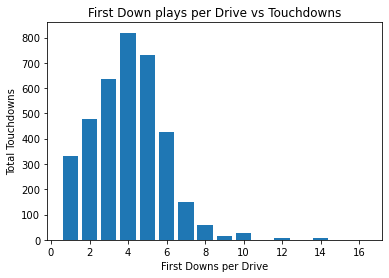

In [22]:
plt.bar(dfFDTS['FirstDowns'],dfFDTS['touchdown'])
plt.xlabel('First Downs per Drive')
plt.ylabel('Total Touchdowns')
plt.title('First Down plays per Drive vs Touchdowns')
plt.savefig("FirstDownsVsTD.png")

In [23]:
dfFirstDownsYards = df.groupby(['yards_gained'],as_index = False)['touchdown'].sum()

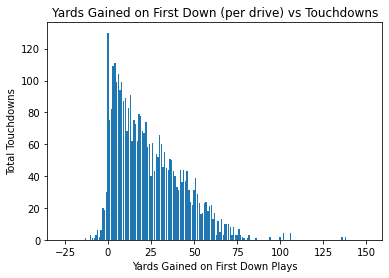

In [24]:
plt.bar(dfFirstDownsYards['yards_gained'],dfFirstDownsYards['touchdown'])
plt.xlabel('Yards Gained on First Down Plays')
plt.ylabel('Total Touchdowns')
plt.title('Yards Gained on First Down (per drive) vs Touchdowns')
plt.savefig("YardsGainedVsTD.png")

In [25]:
#Yards Per First Down Play
dfYDPFD = df.groupby(['yards_per_first_down'],as_index = False)['touchdown'].sum()

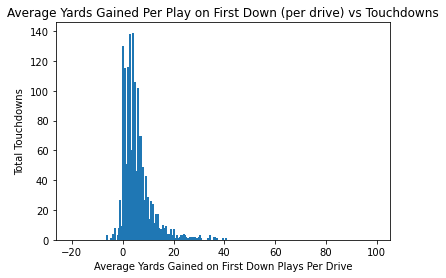

In [26]:
plt.bar(dfYDPFD['yards_per_first_down'],dfYDPFD['touchdown'])
plt.xlabel('Average Yards Gained on First Down Plays Per Drive')
plt.ylabel('Total Touchdowns')
plt.title('Average Yards Gained Per Play on First Down (per drive) vs Touchdowns')
plt.savefig("YardsPerPlay.png")

In [27]:
#this is a command to create the extra window to view the tree
#Run this cell again if you close out of the application accidentally
def create_window():
    newWindow = tkinter.Toplevel(window)
    newWindow.geometry("1600x600")
    Label(newWindow,text = "Tree Generated by XGBoost Model").pack()
    
    newLabel= ImageTk.PhotoImage(imgTree)
    label4 = tkinter.Label(image=newLabel)
    label4.image = newLabel
    Label(newWindow,image=newLabel).pack()
    Label(newWindow,text = "This tree shows that the strongest predictor to Touchdown scoring rate is having more than 6 First Down Plays on that drive.").pack()
    
window = Tk()
window.geometry("1400x600")
window.title("Touchdown Probability")

img1 = Image.open('FirstDownsVsTD.png')
img2 = Image.open('YardsGainedVsTD.png')
img3 = Image.open('YardsPerPlay.png')
imgTree = Image.open('TreeGraph.png')
                     
test= ImageTk.PhotoImage(img1)
label1 = tkinter.Label(image=test)
label1.image = test

test2= ImageTk.PhotoImage(img2)
label2 = tkinter.Label(image=test2)
label2.image = test2

test3= ImageTk.PhotoImage(img3)
label3 = tkinter.Label(image=test3)
label3.image = test3



label1.place(x=50,y=50)
label2.place(x=450,y=50)
label3.place(x=850,y=50)


    
btn = tkinter.Button(window,text="Click Here to View The Tree Generated by the Machine Learning Model",command=create_window)
btn.pack()


window.mainloop()